In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [2]:
blob_centers = np.array([
       [2, 3],
       [1, 3],
       [3, 2],
       [2, 1],
       [1, 1]])
blob_std = np.array([0.3, 0.3, 0.2, 0.1, 0.4])

In [3]:
X, y = make_blobs(n_samples = 4000, centers = blob_centers,
                 cluster_std = blob_std, random_state = 33)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

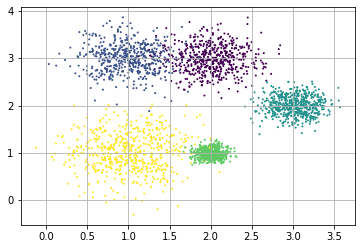

In [4]:
# with label

plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, s = 1)
plt.grid(True)

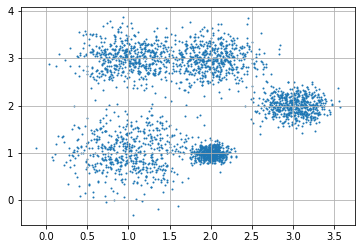

In [5]:
# without label

plt.scatter(X_train[:, 0], X_train[:, 1], s = 1)
plt.grid(True)

In [6]:
from sklearn.cluster import KMeans

In [7]:
range_cluster = range(3, 10)
cost = []

In [8]:
for k in range_cluster:
    kmeans = KMeans(n_clusters = k, random_state = 23)
    kmeans.fit(X_train)
    cost.append(kmeans.inertia_)

Text(0, 0.5, 'Cost')

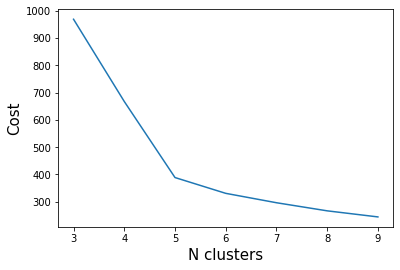

In [9]:
plt.plot(range_cluster, cost)
plt.xlabel('N clusters', fontsize = 15, rotation = 0)
plt.ylabel('Cost', fontsize = 15, rotation = 90)

In [10]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
kmeans.labels_

array([4, 2, 4, ..., 2, 3, 4])

In [12]:
c1 = {}
c2 = {}

l1 = []
l2 = []

for i, j in enumerate(zip(y_train, kmeans.labels_)):
    j, k = j
    
    if j not in c1.keys():
        c1[j] = i
    if k not in c2.keys():
        c2[k] = i
    
    l1.append(c1[j])
    l2.append(c2[k])

In [13]:
l1 = np.array(l1)
l2 = np.array(l2)

sum(l1 == l2)/len(l1)

0.9560714285714286

In [14]:
kmeans.cluster_centers_

array([[3.01529626, 2.00829136],
       [0.92422343, 1.00944672],
       [0.9892568 , 3.0128936 ],
       [1.95862682, 0.99499978],
       [2.01955888, 2.98601322]])

In [15]:
blob_centers

array([[2, 3],
       [1, 3],
       [3, 2],
       [2, 1],
       [1, 1]])

In [16]:
pred = kmeans.predict(X_test)

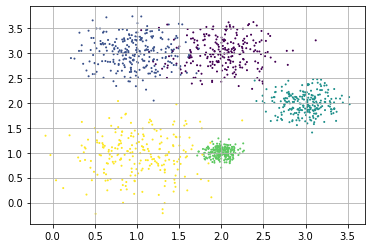

In [17]:
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, s = 1)
plt.grid(True)

[-0.12637338287707744,
 3.5750466724368453,
 -0.3103692320579978,
 3.86618948267432]

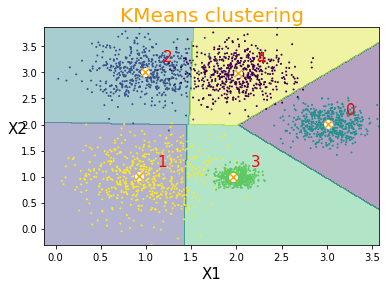

In [18]:
x0, x1 = np.meshgrid(
    np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 300),
    np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 300),
)

X_new = np.c_[x0.ravel(), x1.ravel()]

pred = kmeans.predict(X_new).reshape(x0.shape)

plt.contourf(x0, x1, pred, alpha = 0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, s = 1)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker = 'o', color = 'white', s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker = 'x', color = 'orange', s = 60)

for i, j in enumerate(kmeans.cluster_centers_):
    plt.text(j[0]+0.2, j[1]+0.2, i, color = 'red', fontsize = 15)

plt.title('KMeans clustering', fontsize = 20, color = 'orange')

plt.xlabel('X1', fontsize = 15, rotation = 0)
plt.ylabel('X2', fontsize = 15, rotation = 0)

plt.axis([X_new[:, 0].min(), X_new[:, 0].max(), X_new[:, 1].min(), X_new[:, 1].max()])

In [19]:
kmeans.predict(kmeans.cluster_centers_)

array([0, 1, 2, 3, 4])

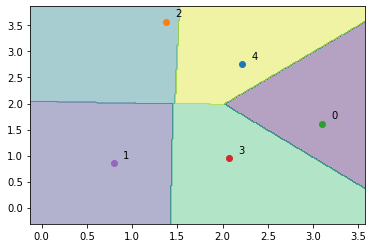

In [20]:
plt.contourf(x0, x1, pred, alpha = 0.4)

for i in range(5):
    m = X_test[y_test == i][0]
    plt.scatter(m[0], m[1])
    plt.text(m[0]+0.1, m[1]+0.1, kmeans.predict([m])[0])

In [21]:
kmeans.transform(X_test[: 5])

array([[1.09343771, 2.17545135, 1.25595249, 1.78175908, 0.30320453],
       [2.26625515, 2.60439174, 0.68220342, 2.64393576, 0.8710795 ],
       [2.34101135, 1.86462533, 0.20551614, 2.18543439, 1.18553971],
       [1.41782477, 1.14689426, 2.32703781, 0.11912571, 2.03475809],
       [0.40564958, 2.26159851, 2.53637203, 1.30115817, 1.75002547]])

In [23]:
x0, x1 = np.meshgrid(
    np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 300),
    np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 300)
)

X_new = np.c_[x0.ravel(), x1.ravel()]

fig = plt.figure(figsize = (15, 35))

for i in range(1, 11):
    kmeans = KMeans(n_clusters = 5, max_iter = i,)
    kmeans.fit(X_train)
    
    axs = fig.add_subplot(5, 2, i)
    
    pred = kmeans.predict(X_new).reshape(x0.shape)
    axs.contourf(x0, x1, pred, alpha = 0.4)
    
    axs.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1])
    
    for j, center in enumerate(kmeans.cluster_centers_):
        axs.text(cener[0]+0.1, center[1]+0.1, )

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1080x2520 with 10 Axes>